In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import filter_data 
import imp
imp.reload(filter_data)
pd.options.display.max_rows = 26
pd.options.display.max_columns = 99
import consts
imp.reload(consts)

<module 'consts' from 'd:\\Ben\\FinalDSProj\\consts.py'>

In [56]:
sepsis_patients = filter_data.get_all_sepsis_patients()


In [57]:
sepsis_patients_19004463 = sepsis_patients[sepsis_patients['subject_id'] == 19004463]

In [58]:
df_icu_stays = pd.read_csv("filtered\\filtered_icustays.csv")
df_icu_stays['intime'] = pd.to_datetime(df_icu_stays['intime'])

In [59]:
intime = df_icu_stays[df_icu_stays['subject_id'] == 19004463]['intime'].values[0]
intime

numpy.datetime64('2177-09-20T11:00:08.000000000')

In [60]:
df_labevents = pd.read_csv("filtered\\filtered_labevents.csv")

C:\Users\Bengo\AppData\Local\Temp\ipykernel_7184\3748132678.py:1: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_labevents = pd.read_csv("filtered\\filtered_labevents.csv")


In [61]:
lab_events_for_patient = df_labevents.loc[df_labevents['subject_id'] == 19004463]
lab_events_for_patient = lab_events_for_patient.loc[lab_events_for_patient['hadm_id'] == 24357541]
only_relevant_lab_results = lab_events_for_patient.loc[lab_events_for_patient['itemid'].isin(consts.LABEVENTS_CODES)].copy()
# only_relevant_lab_results.sort_values(by=['charttime'], inplace=True)
only_relevant_lab_results['charttime'] = pd.to_datetime(only_relevant_lab_results['charttime'])
only_relevant_lab_results['icutime'] = only_relevant_lab_results['charttime'] - intime

In [62]:
labs = only_relevant_lab_results[['subject_id', 'hadm_id', 'charttime', 'icutime', 'itemid_label', 'value', 'valueuom']].copy()

In [63]:
labs

,subject_id,hadm_id,charttime,icutime,itemid_label,value,valueuom
159806,19004463,24357541.0,2177-01-11 17:11:00,-252 days +06:10:52,Lactate,0.8,mmol/L
159807,19004463,24357541.0,2177-01-12 19:10:00,-251 days +08:09:52,Lactate,0.6,mmol/L
159808,19004463,24357541.0,2177-01-13 10:33:00,-251 days +23:32:52,Lactate,1.0,mmol/L
159809,19004463,24357541.0,2177-01-13 19:55:00,-250 days +08:54:52,Lactate,1.0,mmol/L
159810,19004463,24357541.0,2177-01-14 00:19:00,-250 days +13:18:52,Lactate,1.4,mmol/L
159811,19004463,24357541.0,2177-01-14 04:22:00,-250 days +17:21:52,Lactate,1.3,mmol/L
159812,19004463,24357541.0,2177-01-14 23:23:00,-249 days +12:22:52,Lactate,1.9,mmol/L
159813,19004463,24357541.0,2177-01-16 02:13:00,-248 days +15:12:52,Lactate,1.3,mmol/L
159814,19004463,24357541.0,2177-01-18 21:55:00,-245 days +10:54:52,Lactate,1.1,mmol/L
159815,19004463,24357541.0,2177-01-23 23:39:00,-240 days +12:38:52,Lactate,0.5,mmol/L


In [64]:
df_chartevents = pd.read_csv("filtered\\filtered_chartevents.csv")
subject_chartevents = df_chartevents.loc[df_chartevents['subject_id'] == 19004463].copy()
del df_chartevents

C:\Users\Bengo\AppData\Local\Temp\ipykernel_7184\3174654150.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_chartevents = pd.read_csv("filtered\\filtered_chartevents.csv")


MemoryError: Unable to allocate 564. MiB for an array with shape (7, 10564873) and data type int64

In [ ]:
subject_chartevents = subject_chartevents.loc[subject_chartevents['hadm_id'] == 24357541]
subject_chartevents['charttime'] = pd.to_datetime(subject_chartevents['charttime'])
subject_chartevents['icutime'] = subject_chartevents['charttime'] - intime
subject_chartevents

,Unnamed: 0.1,Unnamed: 0,subject_id,hadm_id,stay_id,charttime,storetime,itemid,value,valuenum,valueuom,warning,itemid_label,icutime
1360774,1360774,252546735,14559749,25446716,39899407,2154-05-28 19:14:00,2154-05-28 19:46:00,220045,112.0,112.0,bpm,0,Heart Rate,0 days 00:03:03
1360775,1360775,252546744,14559749,25446716,39899407,2154-05-28 19:44:00,2154-05-28 19:46:00,220045,91.0,91.0,bpm,0,Heart Rate,0 days 00:33:03
1360776,1360776,252546761,14559749,25446716,39899407,2154-05-28 20:00:00,2154-05-28 20:03:00,220045,86.0,86.0,bpm,0,Heart Rate,0 days 00:49:03
1360777,1360777,252546795,14559749,25446716,39899407,2154-05-28 21:00:00,2154-05-28 21:18:00,220045,92.0,92.0,bpm,0,Heart Rate,0 days 01:49:03
1360778,1360778,252546801,14559749,25446716,39899407,2154-05-28 22:00:00,2154-05-28 22:17:00,220045,79.0,79.0,bpm,0,Heart Rate,0 days 02:49:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10561755,10561755,272052229,14559749,25446716,39899407,2154-05-30 00:00:00,2154-05-30 00:12:00,227980,1:1,NaN,NaN,0,Intra Aortic Balloon Pump Setting,1 days 04:49:03
10561756,10561756,272052248,14559749,25446716,39899407,2154-05-30 01:00:00,2154-05-30 01:12:00,227980,1:1,NaN,NaN,0,Intra Aortic Balloon Pump Setting,1 days 05:49:03
10561757,10561757,272052269,14559749,25446716,39899407,2154-05-30 02:00:00,2154-05-30 02:39:00,227980,1:1,NaN,NaN,0,Intra Aortic Balloon Pump Setting,1 days 06:49:03
10561758,10561758,272052293,14559749,25446716,39899407,2154-05-30 03:00:00,2154-05-30 03:28:00,227980,1:1,NaN,NaN,0,Intra Aortic Balloon Pump Setting,1 days 07:49:03


In [ ]:
only_relevant_subject_chartevents = subject_chartevents.loc[subject_chartevents['itemid'].isin(consts.CHARTEVENTS_CODES)].copy()
# query = """
# SELECT ce.icustay_id
#   , ce.charttime
#   , ce.charttime - ie.intime AS icutime
#   , di.label
#   , ce.value
#   , ce.valuenum
#   , ce.valueuom

charts = only_relevant_subject_chartevents[['subject_id', 'hadm_id', 'charttime', 'icutime', 'itemid_label', 'value','valuenum', 'valueuom']].copy()

In [ ]:
df_inputs = pd.read_csv("filtered\\input_events_filtered_by_subject_id_and_medicine.csv")

In [ ]:
subject_id_inputs = df_inputs.loc[df_inputs['subject_id'] == 19004463].copy()
subject_id_inputs = subject_id_inputs.loc[subject_id_inputs['hadm_id'] == 24357541]
subject_id_inputs_only_relevant = subject_id_inputs.loc[subject_id_inputs['itemid'].isin(consts.INPUTEVENTS_CODES)].copy()

In [ ]:
subject_id_inputs = df_inputs.loc[df_inputs['subject_id'] == 19004463].copy()
del df_inputs


In [ ]:
subject_id_inputs = subject_id_inputs.loc[subject_id_inputs['hadm_id'] == 24357541]
subject_id_inputs_only_relevant = subject_id_inputs.loc[subject_id_inputs['itemid'].isin(consts.INPUTEVENTS_CODES)].copy()

In [ ]:
subject_id_inputs_only_relevant['starttime'] = pd.to_datetime(subject_id_inputs_only_relevant['starttime'])
subject_id_inputs_only_relevant['endtime'] = pd.to_datetime(subject_id_inputs_only_relevant['endtime'])
subject_id_inputs_only_relevant['icustarttime'] = subject_id_inputs_only_relevant['starttime'] - intime
subject_id_inputs_only_relevant['icuendtime'] = subject_id_inputs_only_relevant['endtime'] - intime

In [ ]:

# SELECT inp.icustay_id
#   , inp.starttime
#   , inp.endtime
#   , inp.starttime - ie.intime AS icustarttime
#   , inp.endtime - ie.intime AS icuendtime
#   , di.label
#   , inp.amount
#   , inp.amountuom
#   , inp.rate
#   , inp.rateuom
# """

inputs = subject_id_inputs_only_relevant[['subject_id', 'hadm_id', 'starttime', 'endtime', 'icustarttime', 'icuendtime', 'itemid_label', 'amount', 'amountuom', 'rate', 'rateuom',"statusdescription"]].copy()

In [ ]:
# Create column with minutes from ICU intime
charts['icutimehr'] = (charts['icutime'].dt.seconds/60/60)+(charts['icutime'].dt.days*24)
# outputs['icutimehr'] = (outputs['icutime'].dt.seconds/60/60)+(outputs['icutime'].dt.days*24)
inputs['icustarttimehr'] = (inputs['icustarttime'].dt.seconds/60/60)+(inputs['icustarttime'].dt.days*24)
inputs['icuendtimehr'] = (inputs['icuendtime'].dt.seconds/60/60)+(inputs['icuendtime'].dt.days*24)
labs['icutimehr'] = (labs['icutime'].dt.seconds/60/60)+(labs['icutime'].dt.days*24)

In [ ]:
# What are the most commonly measured variables in charts?
# print first 26 rows
pd.options.display.max_rows = 26
inputs[inputs["itemid_label"] == "Norepinephrine"].sort_values(by=['starttime'])

,subject_id,hadm_id,starttime,endtime,icustarttime,icuendtime,itemid_label,amount,amountuom,rate,rateuom,statusdescription,icustarttimehr,icuendtimehr
189564,14559749,25446716,2154-05-29 01:00:00,2154-05-29 04:39:00,0 days 05:49:03,0 days 09:28:03,Norepinephrine,8.000001,mg,0.501093,mcg/kg/min,FinishedRunning,5.817500,9.467500
189561,14559749,25446716,2154-05-29 04:39:00,2154-05-29 08:16:00,0 days 09:28:03,0 days 13:05:03,Norepinephrine,8.000000,mg,0.505711,mcg/kg/min,FinishedRunning,9.467500,13.084167
189562,14559749,25446716,2154-05-29 08:16:00,2154-05-29 11:51:00,0 days 13:05:03,0 days 16:40:03,Norepinephrine,8.000001,mg,0.510416,mcg/kg/min,FinishedRunning,13.084167,16.667500
189565,14559749,25446716,2154-05-29 11:51:00,2154-05-29 15:26:00,0 days 16:40:03,0 days 20:15:03,Norepinephrine,8.000001,mg,0.510416,mcg/kg/min,FinishedRunning,16.667500,20.250833
189563,14559749,25446716,2154-05-29 15:26:00,2154-05-29 19:02:00,0 days 20:15:03,0 days 23:51:03,Norepinephrine,7.891201,mg,0.501143,mcg/kg/min,FinishedRunning,20.250833,23.850833
189560,14559749,25446716,2154-05-29 19:02:00,2154-05-29 20:07:00,0 days 23:51:03,1 days 00:56:03,Norepinephrine,2.374429,mg,0.501093,mcg/kg/min,Stopped,23.850833,24.934167
189567,14559749,25446716,2154-05-29 20:12:00,2154-05-30 03:28:00,1 days 01:01:03,1 days 08:17:03,Norepinephrine,15.929601,mg,0.501177,mcg/kg/min,FinishedRunning,25.017500,32.284167
189566,14559749,25446716,2154-05-30 03:28:00,2154-05-30 04:30:00,1 days 08:17:03,1 days 09:19:03,Norepinephrine,2.264840,mg,0.501093,mcg/kg/min,Stopped,32.284167,33.317500


<Figure size 7200x4320 with 0 Axes>

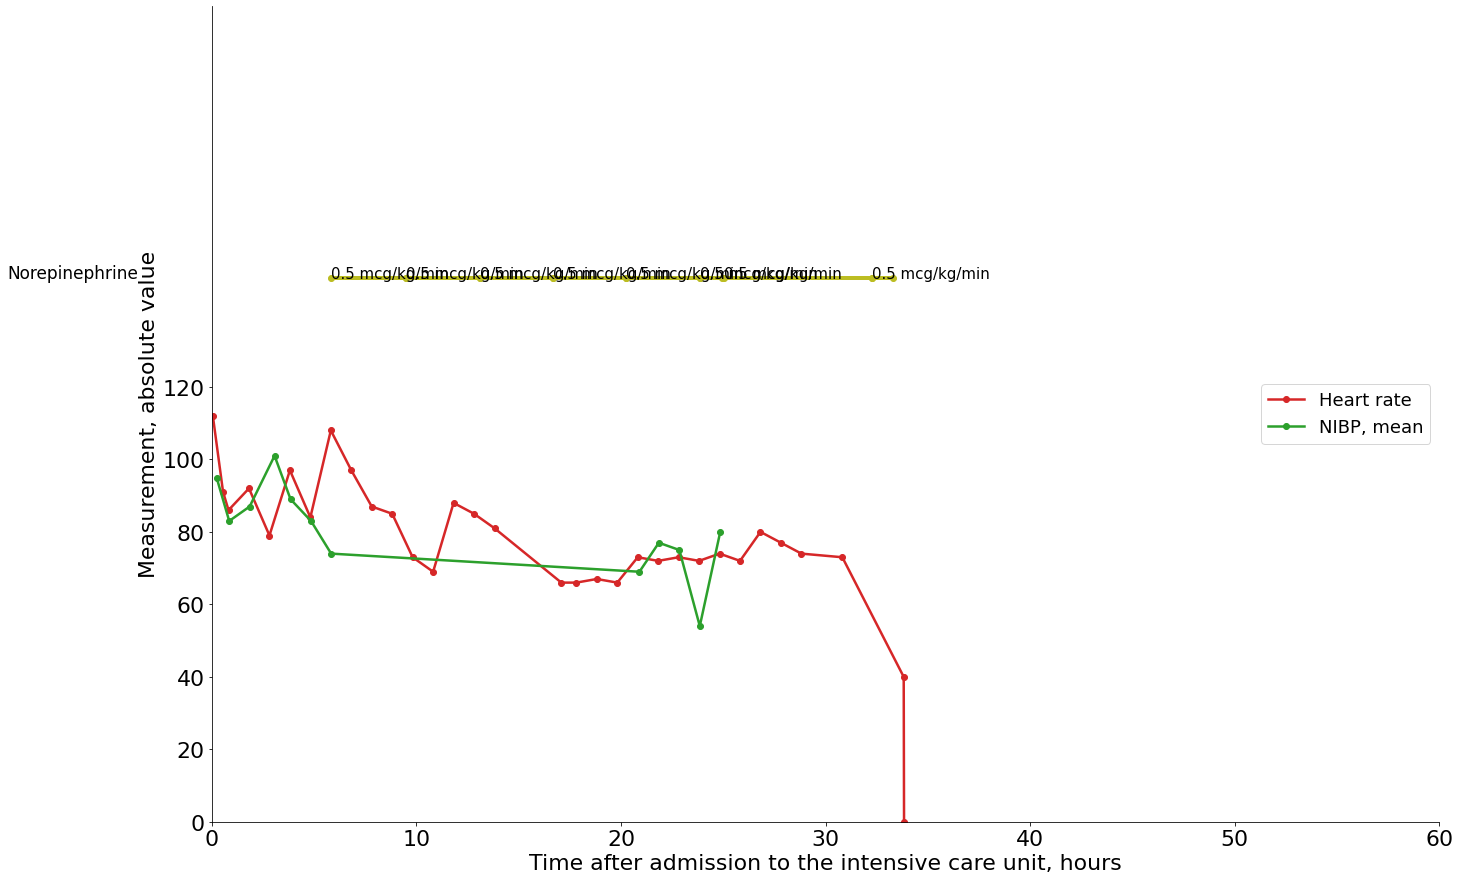

In [ ]:
# Plot sample data over first 24 hours from admission to ICU
# Credit: Randal Olson for styling (http://www.randalolson.com/2014/06/28/)

# Prepare the size of the figure
fig = plt.figure(figsize=(22, 15))
plt.rcParams.update({'font.size': 22})

# "Tableau 20" colors as RGB.   
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
    
# Remove the plot frame lines. 
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(True)    
  
# Ensure that the axis ticks only show up on the bottom and left of the plot.      
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left() 
ax.axis([0,60,0,225])

# Plot vital signs
plt.plot(charts.icutimehr[charts.itemid_label=='Heart Rate'], 
         charts.valuenum[charts.itemid_label=='Heart Rate'],
         color=tableau20[6], lw=2.5,
         marker='o', markersize=6, label='Heart rate')

plt.plot(charts.icutimehr[charts.itemid_label=='Non Invasive Blood Pressure mean'], 
         charts.valuenum[charts.itemid_label=='Non Invasive Blood Pressure mean'],
         color=tableau20[4], lw=2.5,
         marker='o', markersize=6, label='NIBP, mean')


# Plot intravenous 'Norepinephrine', 'Vasopressin', 'Epinephrine'
plt.text(-10,150,'Norepinephrine',fontsize=17)
for i,row in inputs.loc[(inputs["itemid_label"] =='Norepinephrine') & (inputs["rate"] > 0)].iterrows():
    plt.plot([row['icustarttimehr'],row['icuendtimehr']],[150]*2,
             color=tableau20[16], lw=4,marker='o', markersize=6)
    plt.text(row['icustarttimehr'],150,
             str(round(row['rate'],1)) + ' ' + str(row['rateuom']),
             fontsize=15)
# plt.plot(outputs.icutimehr, 
#          outputs.value.cumsum()/100, 
#          color=tableau20[10], lw=2.5,
#          marker='o', markersize=6, label='Output volume, dL')

# Plot intravenous meds
# plt.text(-10,150,'NaCl 0.9%',fontsize=17)
# for i,row in inputs.loc[(inputs["label"] =='NaCl 0.9%') & (inputs["rate"] > 0)].iterrows():
#     plt.plot([row['icustarttimehr'],row['icuendtimehr']],[150]*2,
#              color=tableau20[16], lw=4,marker='o', markersize=6)
#     plt.text(row['icustarttimehr'],150,
#              str(round(row['rate'],1)) + ' ' + str(row['rateuom']),
#              fontsize=15)
# # Plot labs
# plt.text(-10,175,'Neutrophil, %',fontsize=17)
# for i, txt in enumerate(labs.value[labs.label=='NEUTROPHILS'].values):
#         plt.annotate(txt, (labs.icutimehr[labs.label=='NEUTROPHILS'].
#                            values[i],175),fontsize=17) 

# plt.text(-10,185,'Creatinine, mg/dL',fontsize=17)        
# for i, txt in enumerate(labs.value[labs.label=='CREATININE'].values):
#         plt.annotate(txt, (labs.icutimehr[labs.label=='CREATININE'].
#                            values[i],185),fontsize=17)

        
plt.legend(loc=5,fontsize=18)
plt.xlabel('Time after admission to the intensive care unit, hours', fontsize=22)
plt.ylabel('Measurement, absolute value', fontsize=22)
import numpy as np
plt.yticks(np.arange(0, 140, 20))

plt.show()
# Save the figure
# fig.savefig('examplepatient.png', bbox_inches='tight')

In [ ]:
inputs[inputs["itemid_label"] =='Norepinephrine'].sort_values(by=['starttime'])


,subject_id,hadm_id,starttime,endtime,icustarttime,icuendtime,itemid_label,amount,amountuom,rate,rateuom,statusdescription,icustarttimehr,icuendtimehr
189564,14559749,25446716,2154-05-29 01:00:00,2154-05-29 04:39:00,0 days 05:49:03,0 days 09:28:03,Norepinephrine,8.000001,mg,0.501093,mcg/kg/min,FinishedRunning,5.817500,9.467500
189561,14559749,25446716,2154-05-29 04:39:00,2154-05-29 08:16:00,0 days 09:28:03,0 days 13:05:03,Norepinephrine,8.000000,mg,0.505711,mcg/kg/min,FinishedRunning,9.467500,13.084167
189562,14559749,25446716,2154-05-29 08:16:00,2154-05-29 11:51:00,0 days 13:05:03,0 days 16:40:03,Norepinephrine,8.000001,mg,0.510416,mcg/kg/min,FinishedRunning,13.084167,16.667500
189565,14559749,25446716,2154-05-29 11:51:00,2154-05-29 15:26:00,0 days 16:40:03,0 days 20:15:03,Norepinephrine,8.000001,mg,0.510416,mcg/kg/min,FinishedRunning,16.667500,20.250833
189563,14559749,25446716,2154-05-29 15:26:00,2154-05-29 19:02:00,0 days 20:15:03,0 days 23:51:03,Norepinephrine,7.891201,mg,0.501143,mcg/kg/min,FinishedRunning,20.250833,23.850833
189560,14559749,25446716,2154-05-29 19:02:00,2154-05-29 20:07:00,0 days 23:51:03,1 days 00:56:03,Norepinephrine,2.374429,mg,0.501093,mcg/kg/min,Stopped,23.850833,24.934167
189567,14559749,25446716,2154-05-29 20:12:00,2154-05-30 03:28:00,1 days 01:01:03,1 days 08:17:03,Norepinephrine,15.929601,mg,0.501177,mcg/kg/min,FinishedRunning,25.017500,32.284167
189566,14559749,25446716,2154-05-30 03:28:00,2154-05-30 04:30:00,1 days 08:17:03,1 days 09:19:03,Norepinephrine,2.264840,mg,0.501093,mcg/kg/min,Stopped,32.284167,33.317500
